# IMPORTS AND FUNCTIONS

In [1]:
import os
import random
import cv2
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from sklearn.preprocessing import LabelEncoder


c:\Users\larar\anaconda3\envs\deeplearning2024\Lib\site-packages\onnxruntime\capi\onnxruntime_validation.py:26: UserWarning: Unsupported Windows version (11). ONNX Runtime supports Windows 10 and above, only.
  warnings.warn(


In [2]:
from functions_preprocessing import combine_image_folders, erase_double_images, train_test

import functions_licenseplate as fl

import functions_recognition as r

import SVC as svc

import CNN as cnn

import API_car_model as api

# PREPROCESSING DATA

In [17]:

"""source_folders = [
    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/FOTOS MERI",
    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/FOTOS",
    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/FOTOS LARA",
    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/Images (CV)/Frontal",
    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/Images (CV)/Lateral"
]

destination_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES'
combine_image_folders(source_folders, destination_folder) #ALREADY CREATED"""


Folder created: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES


In [18]:

"""folder_path = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES'
erase_double_images(folder_path)"""

Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\8970GZR (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\7122FYJ (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\2748LKK (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\0085LND (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\1139LJX (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\2375KFD (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\4634JKH (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\4346HMW (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\8033MLP (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\4812GTX (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\3214LCL (1).jpg
Deleted: G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\7911LYX (1).jpg
Deleted: G:/Mi u

In [19]:
"""source_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES'  
train_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset'    
test_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_testset'     
val_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_validationset'
# Call the train_test function to perform the split
train_test(source_folder, train_folder, test_folder, val_folder)"""


Data split complete: 144 training files, 72 testing files, 24 validation files.


# DETECTION LICENSE PLATE

## CROPPING USING YOLO

In [20]:
"""image_folder_2 = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset'
cropped_plates_train = fl.boundingbox(image_folder_2)#dictionary name plate (sequence) + croppedd image
image_folder_3 = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_testset'
cropped_plates_train = fl.boundingbox(image_folder_3)#dictionary name plate (sequence) + croppedd image
image_folder_4 = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_validationset'
cropped_plates_train = fl.boundingbox(image_folder_4)#dictionary name plate (sequence) + croppedd image"""

In [ ]:
"""save_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages'
fl.display_and_save_cropped_plates(cropped_plates_train, save_folder)
save_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_testset_croppedimages'
fl.display_and_save_cropped_plates(cropped_plates_train, save_folder)
save_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_validationset_croppedimages'
fl.display_and_save_cropped_plates(cropped_plates_train, save_folder)"""

# TRAINING MODELS (character detection)

## SVC MODEL 

In [4]:
base_path_lara = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Dataset Characters'
accuracy, clf, scaler, label_encoder = svc.train_svm_and_get_accuracy(base_path_lara)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 87.21%


## CNN MODEL

In [5]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  
    transforms.Resize((28, 28)),                 
    transforms.ToTensor(),                        
    transforms.Normalize((0.5,), (0.5,))         
])

dataset = ImageFolder(root= base_path_lara, transform=transform)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

#print(f"Classes: {dataset.classes}")

num_classes = len(dataset.classes)
model = cnn.CNNModel(num_classes)

criterion = cnn.nn.CrossEntropyLoss() 
optimizer = cnn.optim.Adam(model.parameters(), lr=0.001)

model.to(cnn.device)

cnn.train_model(model, train_loader, criterion, optimizer, num_epochs=30)
cnn.evaluate_model(model,test_loader)

Epoch [1/30], Loss: 3.533193674954501
Epoch [2/30], Loss: 3.092834711074829
Epoch [3/30], Loss: 2.2091486237265845
Epoch [4/30], Loss: 1.2046288035132668
Epoch [5/30], Loss: 0.7067562206224962
Epoch [6/30], Loss: 0.46302245963703503
Epoch [7/30], Loss: 0.2597790604287928
Epoch [8/30], Loss: 0.19918665154413742
Epoch [9/30], Loss: 0.21600235084241087
Epoch [10/30], Loss: 0.1327815538441593
Epoch [11/30], Loss: 0.10697351667014035
Epoch [12/30], Loss: 0.09330420941114426
Epoch [13/30], Loss: 0.1663627875122157
Epoch [14/30], Loss: 0.15445650843056766
Epoch [15/30], Loss: 0.14115071677687493
Epoch [16/30], Loss: 0.07918428934433243
Epoch [17/30], Loss: 0.05282478136095134
Epoch [18/30], Loss: 0.06561352147466758
Epoch [19/30], Loss: 0.045660119419070805
Epoch [20/30], Loss: 0.026724901209077376
Epoch [21/30], Loss: 0.022798209789801727
Epoch [22/30], Loss: 0.041549595750190994
Epoch [23/30], Loss: 0.05503723910078406
Epoch [24/30], Loss: 0.05663024200211195
Epoch [25/30], Loss: 0.03058460

# RESULTS

## TRAINING RESULTS

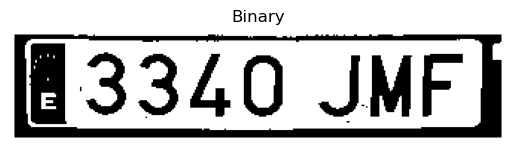

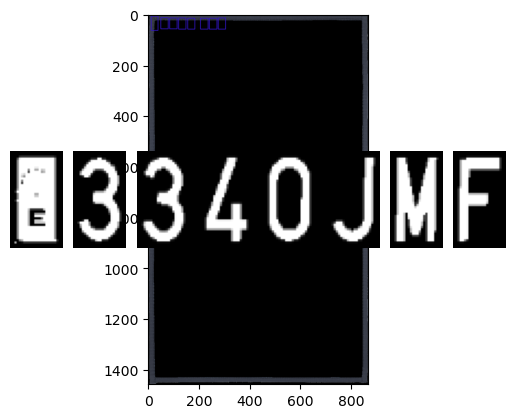

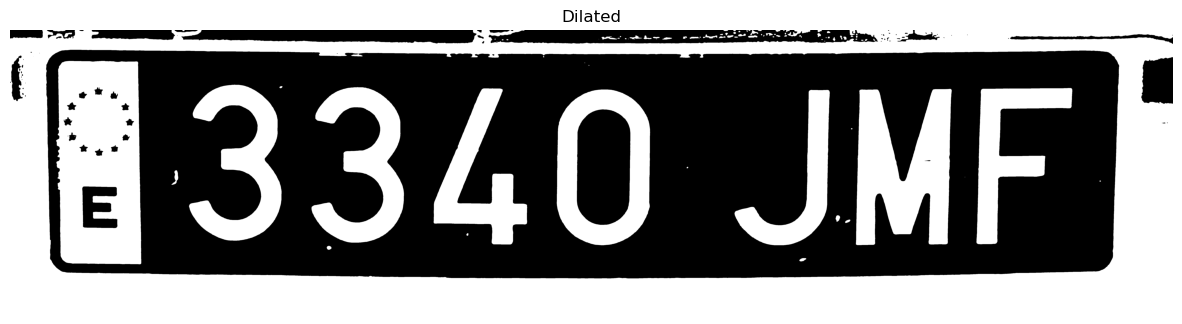

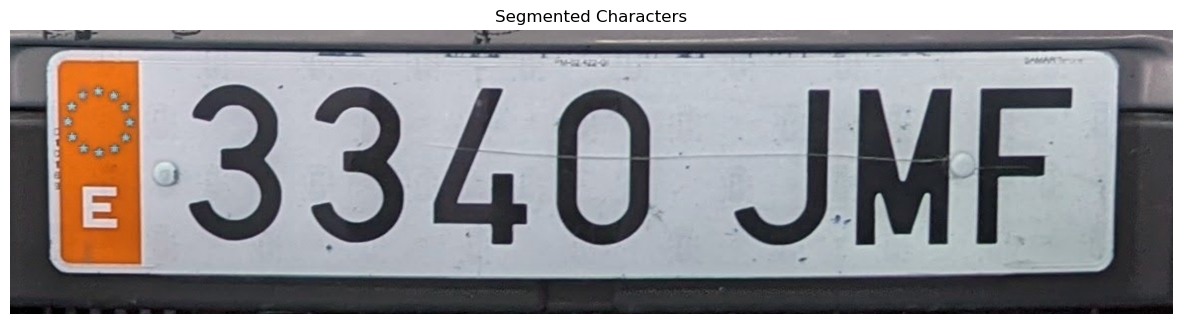

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


0.25699064022181983
0.41075022736916733
0.4316547056199569
0.32579978638714563
0.17108334998443123
0.31638954202082925
0.12640355766204148
0.2712194699056374
Detected Text: E, Probability: 0.9480966557487278
Detected Text: 3340 JMF, Probability: 0.9533874295952823


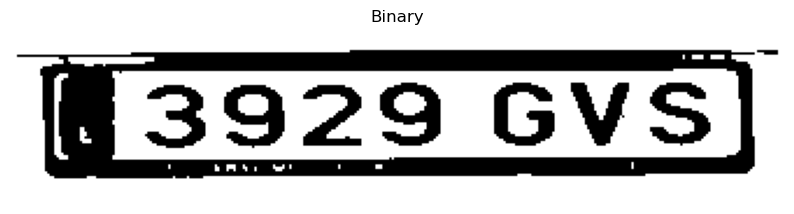

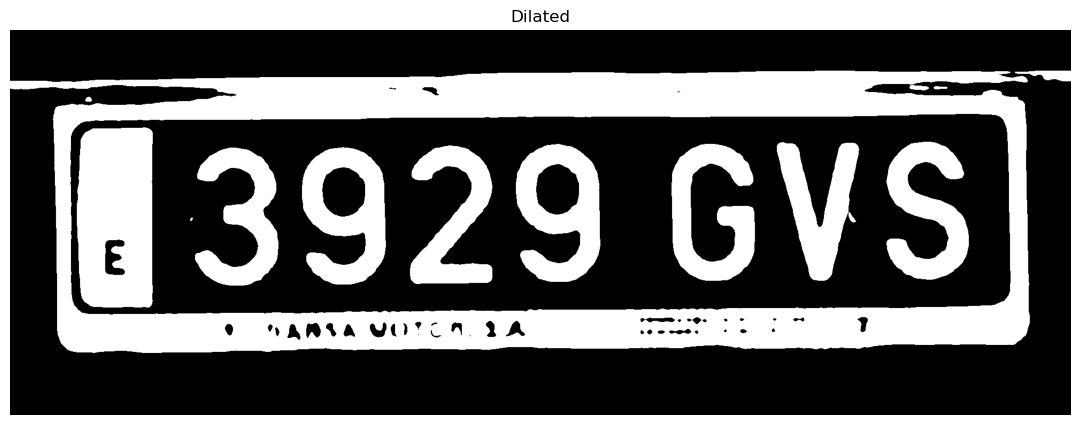

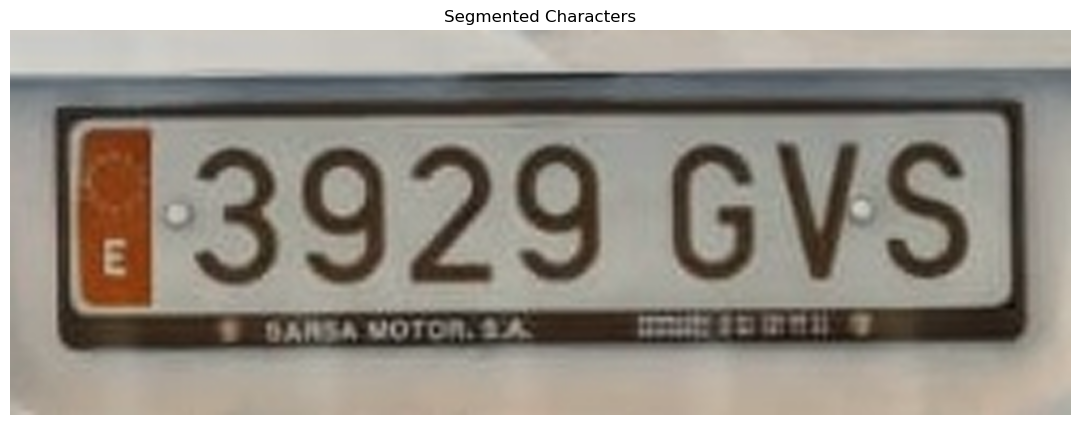

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected Text: E, Probability: 0.2401941211893508
Detected Text: 3929 GVS, Probability: 0.8500121895074426
Detected Text: Oin Votonn, Probability: 0.006442795640062095


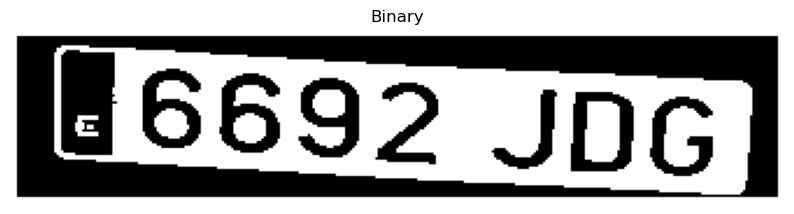

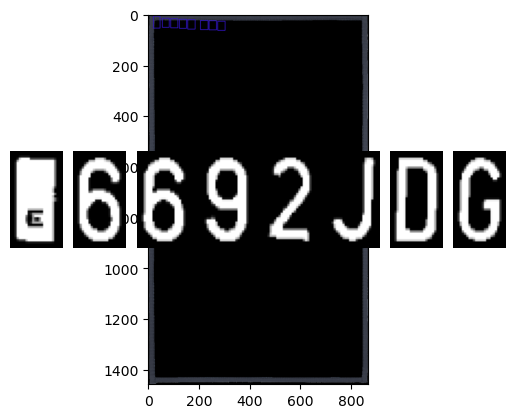

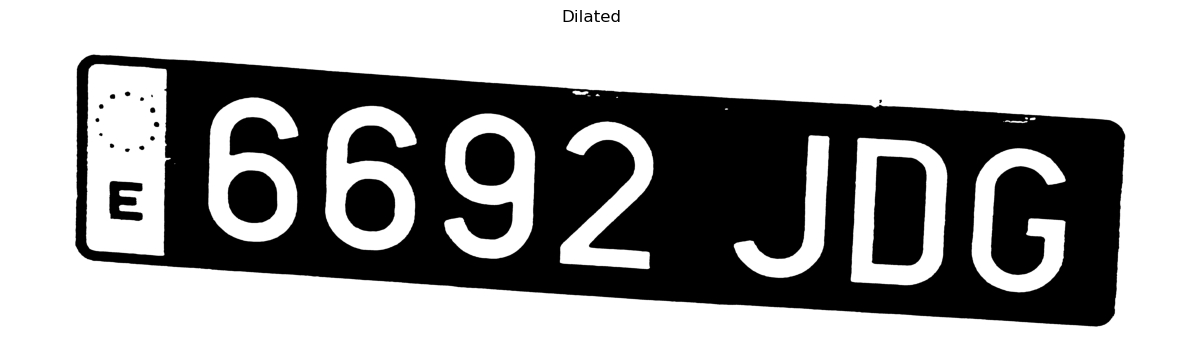

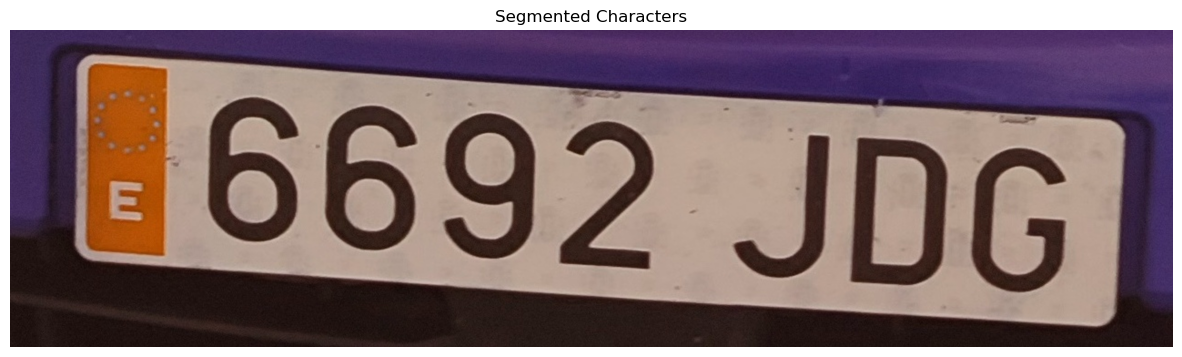

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


0.22744214701401488
0.21993975296348495
0.2045695866847101
0.1926595488479477
0.27503063728824423
0.29160751636376436
0.23529676184283016
0.09715966434658126
Detected Text: E, Probability: 0.9708661361226554
Detected Text: 6692 JDG, Probability: 0.9990949796460704


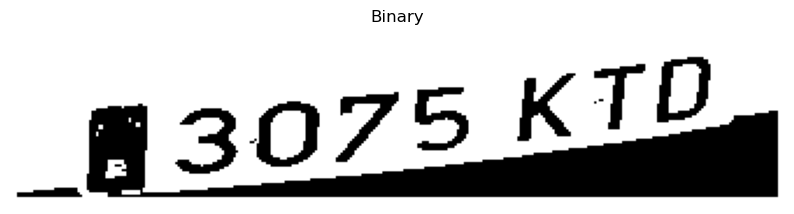

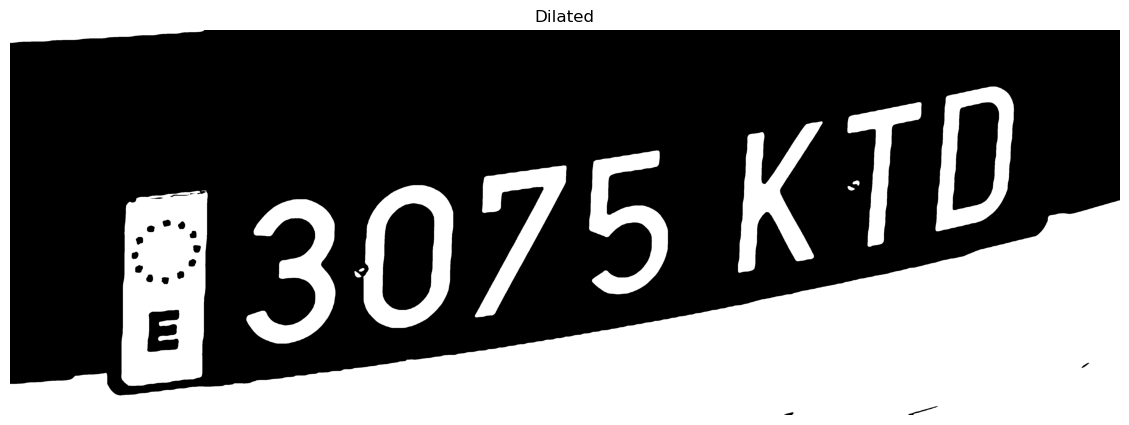

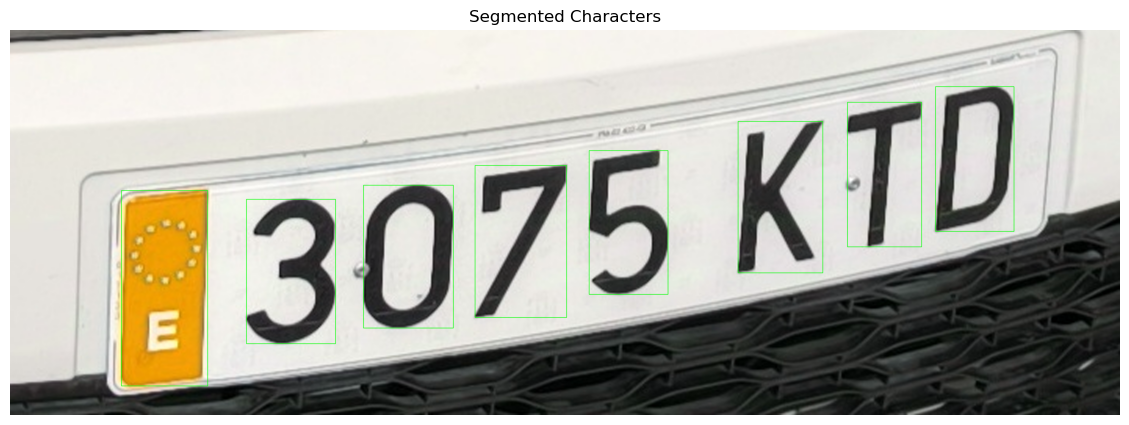

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


0.31677848049616586
0.5160460051664228
0.3774086631129235
0.4386221193344355
0.39636806571944055
0.31685187921994784
0.2078463590674659
0.36397558821304504
Detected Text: KTD, Probability: 0.9829797104539167
Detected Text: E, Probability: 0.9135467975824305
Detected Text: 3075, Probability: 0.7432068697188652


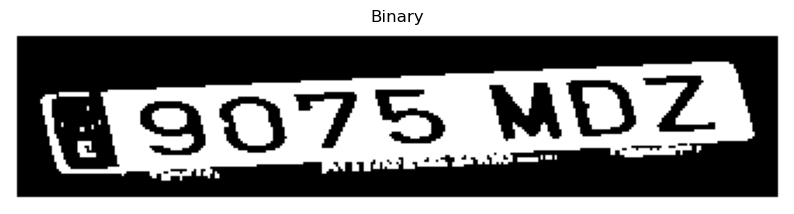

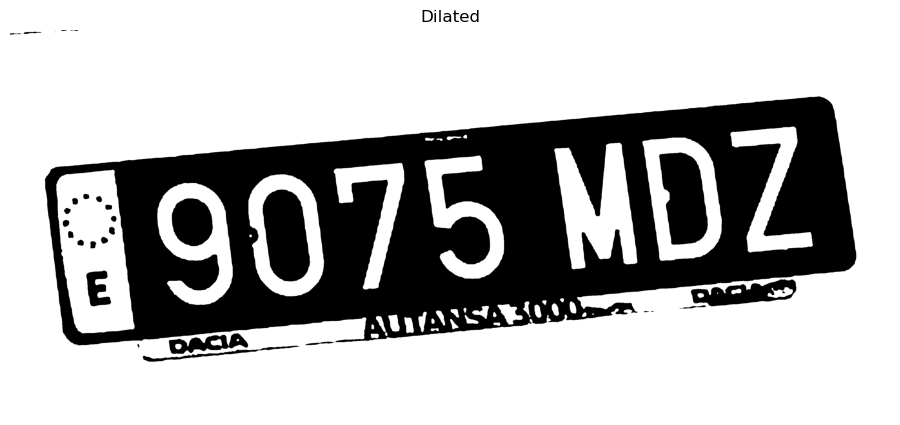

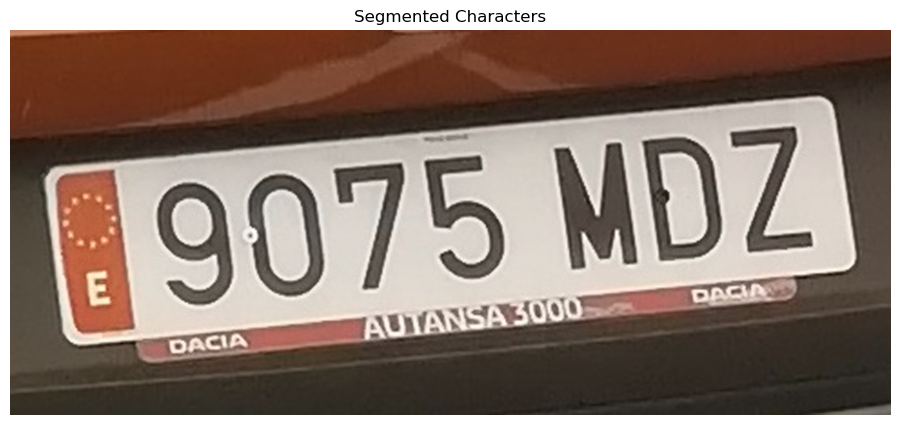

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected Text: 9075 MDZ, Probability: 0.9010600815033488
Detected Text: E, Probability: 0.9731620718323484
Detected Text: Dnain, Probability: 0.05105867969048223
Detected Text: AQLANSAsOdN, Probability: 0.05468052613880103
Detected Text: Dacia, Probability: 0.1527260303512878


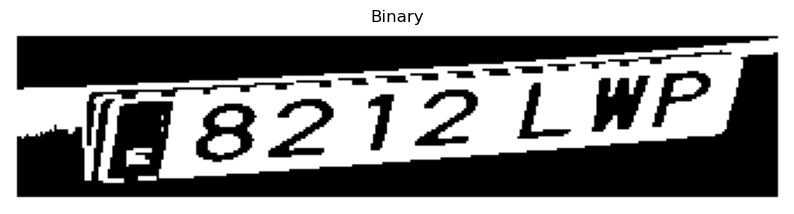

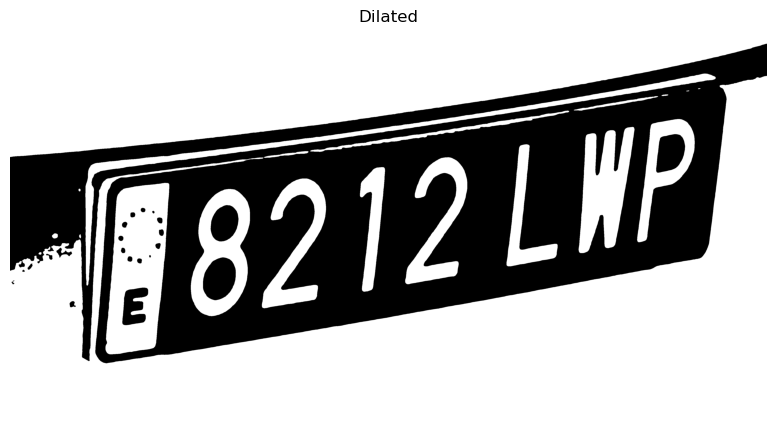

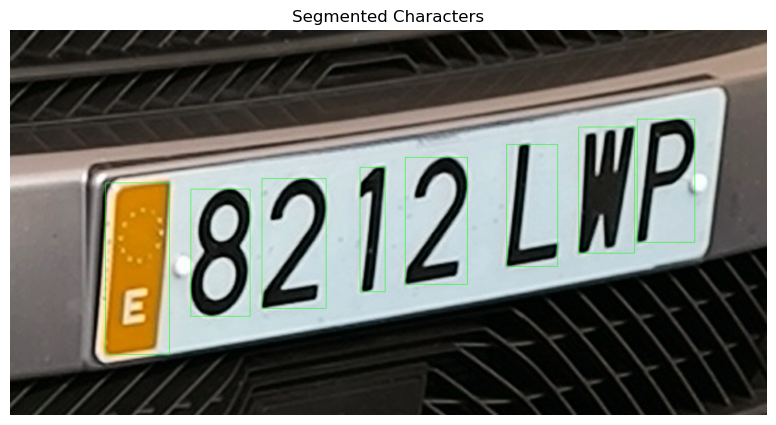

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


0.2964046501128831
0.36202534824554033
0.30189097757000366
0.2645202330513718
0.2937771911230181
0.2840765751099341
0.13482876475238567
0.35108934038851075
Detected Text: 8212, Probability: 0.9999662041664124
Detected Text: L, Probability: 0.6176280055666054
Detected Text: MP, Probability: 0.2892847972700132
Detected Text: E, Probability: 0.9508443833785272
Detected Text: U, Probability: 0.0028291919896684115
Detected Text: , Probability: 0.0
Detected Text: L, Probability: 0.4185448507482512
Detected Text: k, Probability: 0.29003259225115485
Detected Text: 3, Probability: 0.004324860906945782


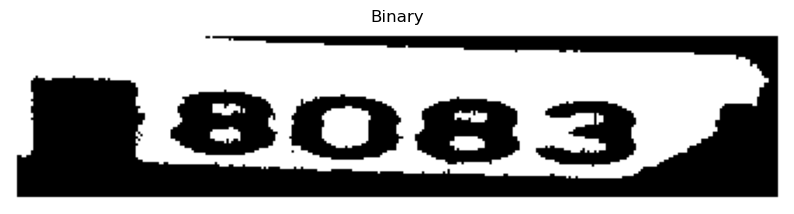

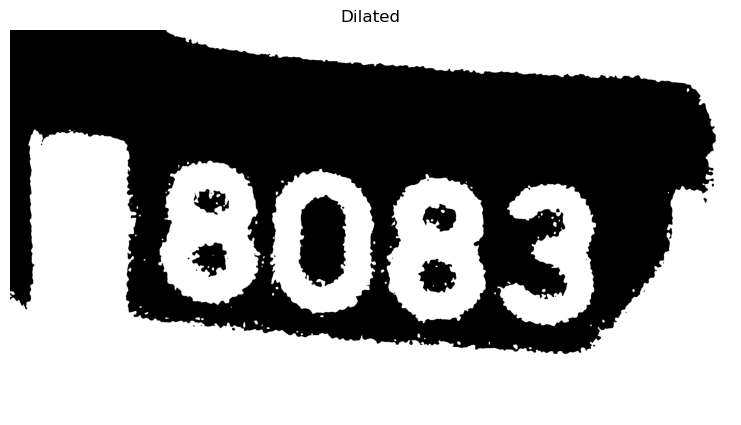

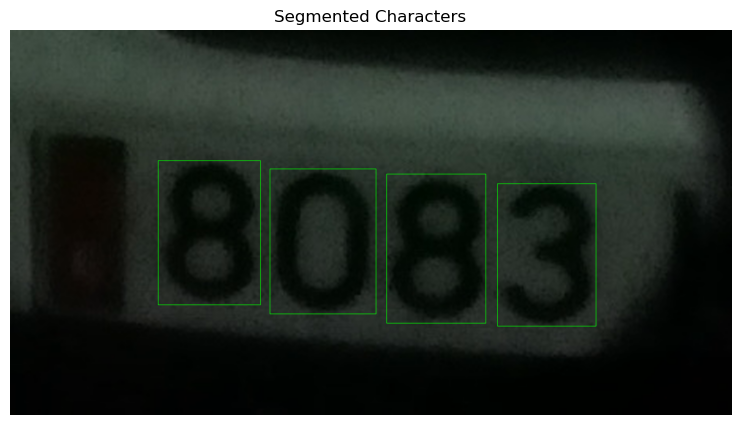

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


0.2602910106778278
0.5504576404624736
0.21467736615670013
0.6353304689706532
Detected Text: F, Probability: 0.01950330092654795


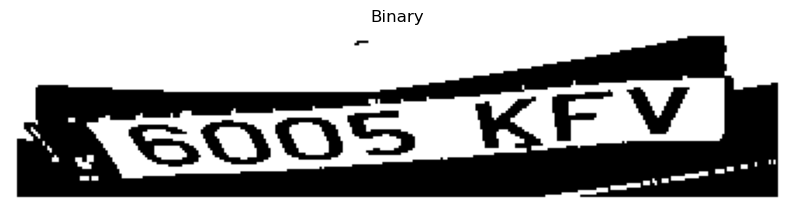

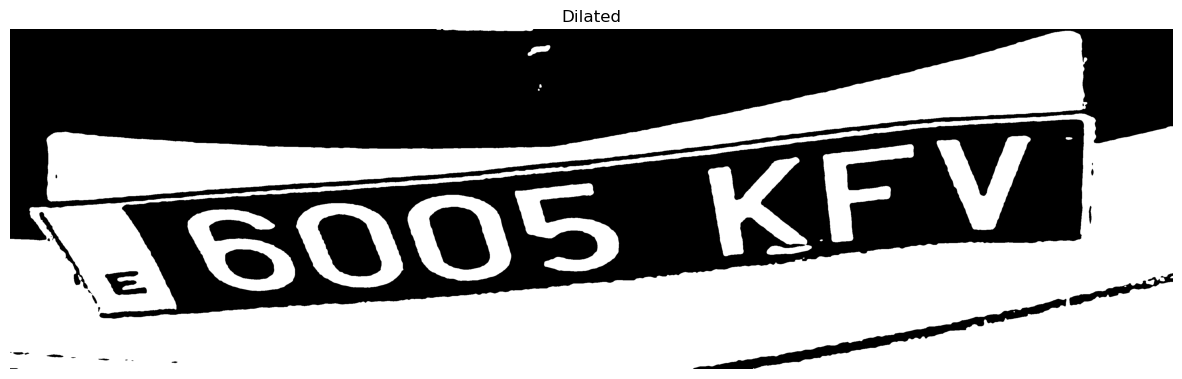

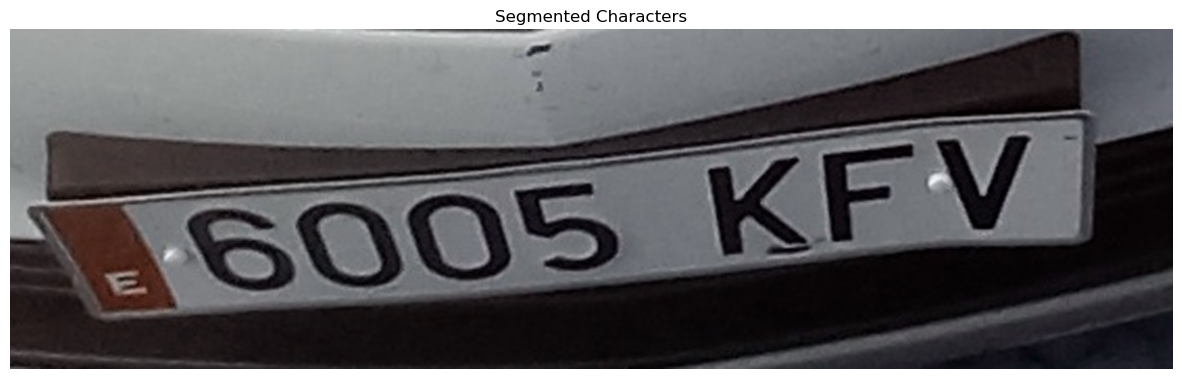

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected Text: 6005, Probability: 0.9937326312065125
Detected Text: KFV, Probability: 0.9996633131731183


In [ ]:
pc_lara = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages'
# Define directories for saving Spanish and non-Spanish results
spanish_dir = "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Results_Spain (TRAIN)"
non_spanish_dir = "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Results_Rest (TRAIN)"

predict_train_svc = []
predict_train_svc_filter = []
predict_train_cnn = []
predict_train_cnn_filter = []
predict_train_ocr = []
predict_train_ocr_filter = []

# Create directories if they don't exist
os.makedirs(spanish_dir, exist_ok=True)
os.makedirs(non_spanish_dir, exist_ok=True)

# Loop over the image files
for image_file in os.listdir(pc_lara):
    if image_file.endswith('.jpg'):  # Ensure we're processing image files only
        image_path = os.path.join(pc_lara, image_file)
        image = cv2.imread(image_path)
        car = image.copy()

        # SEGMENTATION CHARACTERS------------------------------------------
        # METHOD 1
        m1_chars = r.segment_characters(image)
        r.visualize_char(m1_chars)

        # METHOD 2
        upscaled_license_plate, m2_chars = r.OCR_image(
            license_plate=image, t=180, min_h=80, min_w=20, min_ar=0.2, max_ar=1.4, area=6000)

        # Choose the best method
        best_char = r.best_segmentation_method(m1_chars, m2_chars)

        #SAVE CHARACTERS IF WELL-SEGMENTED TO INCREASE THE DATASET (only trainset images)
        #for i in range(len(characters)):
        #save the files to expand the dataset
        #output_path = os.path.join("G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Dataset Characters", f'caracter_{i}.png')
        #cv2.imwrite(output_path, characters[i])
        
        # PREDICTION MODELS------------------------------------------
        plate_sol = svc.test_preprocessed_images_with_plot(clf, scaler, best_char, label_encoder)
        predict_train_svc.append(plate_sol)
        label_encoder = LabelEncoder()
        label_encoder.fit(dataset.classes)  
        predicted_plate = cnn.predict_characters(model, best_char, label_encoder)
        predict_train_cnn.append(predicted_plate)
        license_plate_text = r.easy_ocr_method(upscaled_license_plate)
        predict_train_ocr.append(license_plate_text)

        # Ask if the plate is Spanish
        spain = input("Is it a Spanish plate?: ")

        # Create the figure and axes for plotting
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))  
        
        if spain.upper() == "Y":
            # Filter for Spanish plates
            filter_plate_svc = r.filter_spain_plates(plate_sol)
            predict_train_svc_filter.append(filter_plate_svc)
            filter_plate_cnn = r.filter_spain_plates(predicted_plate)
            predict_train_cnn_filter.append(filter_plate_cnn)
            filter_plate_ocr = r.filter_spain_plates(license_plate_text)
            predict_train_ocr_filter.append(filter_plate_ocr)

            # Update titles to include filtered predictions
            axes[0].set_title(f"SVM Prediction: {plate_sol}\nFiltered: {filter_plate_svc}")
            axes[1].set_title(f"CNN Prediction: {predicted_plate}\nFiltered: {filter_plate_cnn}")
            axes[2].set_title(f"EasyOCR Prediction: {license_plate_text}\nFiltered: {filter_plate_ocr}")

            save_dir = spanish_dir  # Save results in the Spanish folder

        else:
            # No filtering for non-Spanish plates
            axes[0].set_title(f"SVM Prediction: {plate_sol}")
            axes[1].set_title(f"CNN Prediction: {predicted_plate}")
            axes[2].set_title(f"EasyOCR Prediction: {license_plate_text}")

            save_dir = non_spanish_dir  # Save results in the non-Spanish folder

        # Plot the car image with the respective titles
        axes[0].imshow(car, cmap='gray')
        axes[0].axis('off')

        axes[1].imshow(car, cmap='gray')
        axes[1].axis('off')

        axes[2].imshow(car, cmap='gray')
        axes[2].axis('off')

        plt.tight_layout()

        # Save the image with a relevant name in the correct folder
        result_image_path = os.path.join(save_dir, f'{os.path.splitext(image_file)[0]}.png')
        plt.savefig(result_image_path)
        plt.close()


## TEST RESULTS

In [ ]:
pc_lara = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_testset_croppedimages'
spanish_dir = "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Results_Spain (TEST)"
non_spanish_dir = "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Results_Rest (TEST)"

predict_test_svc = []
predict_test_svc_filter = []
predict_test_cnn = []
predict_test_cnn_filter = []
predict_test_ocr = []
predict_test_ocr_filter = []

# Create directories if they don't exist
os.makedirs(spanish_dir, exist_ok=True)
os.makedirs(non_spanish_dir, exist_ok=True)

# Loop over the image files
for image_file in os.listdir(pc_lara):
    if image_file.endswith('.jpg'):  # Ensure we're processing image files only
        image_path = os.path.join(pc_lara, image_file)
        image = cv2.imread(image_path)
        car = image.copy()

        # SEGMENTATION CHARACTERS------------------------------------------
        # METHOD 1
        m1_chars = r.segment_characters(image)
        r.visualize_char(m1_chars)

        # METHOD 2
        upscaled_license_plate, m2_chars = r.OCR_image(
            license_plate=image, t=180, min_h=80, min_w=20, min_ar=0.2, max_ar=1.4, area=6000)

        # Choose the best method
        best_char = r.best_segmentation_method(m1_chars, m2_chars)

        # PREDICTION MODELS------------------------------------------
        plate_sol = svc.test_preprocessed_images_with_plot(clf, scaler, best_char, label_encoder)
        predict_test_svc.append(plate_sol)
        label_encoder = LabelEncoder()
        label_encoder.fit(dataset.classes)  
        predicted_plate = cnn.predict_characters(model, best_char, label_encoder)
        predict_test_cnn.append(predicted_plate)
        license_plate_text = r.easy_ocr_method(upscaled_license_plate)
        predict_test_ocr.append(license_plate_text)

        # Ask if the plate is Spanish
        spain = input("Is it a Spanish plate?: ")

        # Create the figure and axes for plotting
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))  
        
        if spain.upper() == "Y":
            # Filter for Spanish plates
            filter_plate_svc = r.filter_spain_plates(plate_sol)
            predict_test_svc_filter.append(filter_plate_svc)
            filter_plate_cnn = r.filter_spain_plates(predicted_plate)
            predict_test_cnn_filter.append(filter_plate_cnn)
            filter_plate_ocr = r.filter_spain_plates(license_plate_text)
            predict_test_ocr_filter.append(filter_plate_ocr)

            # Update titles to include filtered predictions
            axes[0].set_title(f"SVM Prediction: {plate_sol}\nFiltered: {filter_plate_svc}")
            axes[1].set_title(f"CNN Prediction: {predicted_plate}\nFiltered: {filter_plate_cnn}")
            axes[2].set_title(f"EasyOCR Prediction: {license_plate_text}\nFiltered: {filter_plate_ocr}")

            save_dir = spanish_dir  # Save results in the Spanish folder

        else:
            # No filtering for non-Spanish plates
            axes[0].set_title(f"SVM Prediction: {plate_sol}")
            axes[1].set_title(f"CNN Prediction: {predicted_plate}")
            axes[2].set_title(f"EasyOCR Prediction: {license_plate_text}")

            save_dir = non_spanish_dir  # Save results in the non-Spanish folder

        # Plot the car image with the respective titles
        axes[0].imshow(car, cmap='gray')
        axes[0].axis('off')

        axes[1].imshow(car, cmap='gray')
        axes[1].axis('off')

        axes[2].imshow(car, cmap='gray')
        axes[2].axis('off')

        plt.tight_layout()

        # Save the image with a relevant name in the correct folder
        result_image_path = os.path.join(save_dir, f'{os.path.splitext(image_file)[0]}.png')
        plt.savefig(result_image_path)
        plt.close()


## VALIDATION RESULTS

In [ ]:
pc_lara = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_validationset_croppedimages'
spanish_dir = "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Results_Spain (VALIDATION)"
non_spanish_dir = "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Results_Rest (VALIDATION)"

predict_validation_svc = []
predict_validation_svc_filter = []
predict_validation_cnn = []
predict_validation_cnn_filter = []
predict_validation_ocr = []
predict_validation_ocr_filter = []

# Create directories if they don't exist
os.makedirs(spanish_dir, exist_ok=True)
os.makedirs(non_spanish_dir, exist_ok=True)

# Loop over the image files
for image_file in os.listdir(pc_lara):
    if image_file.endswith('.jpg'):  # Ensure we're processing image files only
        image_path = os.path.join(pc_lara, image_file)
        image = cv2.imread(image_path)
        car = image.copy()

        # SEGMENTATION CHARACTERS------------------------------------------
        # METHOD 1
        m1_chars = r.segment_characters(image)
        r.visualize_char(m1_chars)

        # METHOD 2
        upscaled_license_plate, m2_chars = r.OCR_image(
            license_plate=image, t=180, min_h=80, min_w=20, min_ar=0.2, max_ar=1.4, area=6000)

        # Choose the best method
        best_char = r.best_segmentation_method(m1_chars, m2_chars)

        # PREDICTION MODELS------------------------------------------
        plate_sol = svc.test_preprocessed_images_with_plot(clf, scaler, best_char, label_encoder)
        predict_validation_svc.append(plate_sol)
        label_encoder = LabelEncoder()
        label_encoder.fit(dataset.classes)  
        predicted_plate = cnn.predict_characters(model, best_char, label_encoder)
        predict_validation_cnn.append(predicted_plate)
        license_plate_text = r.easy_ocr_method(upscaled_license_plate)
        predict_validation_ocr.append(license_plate_text)

        # Ask if the plate is Spanish
        spain = input("Is it a Spanish plate?: ")

        # Create the figure and axes for plotting
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))  
        
        if spain.upper() == "Y":
            # Filter for Spanish plates
            filter_plate_svc = r.filter_spain_plates(plate_sol)
            predict_validation_svc_filter.append(filter_plate_svc)
            filter_plate_cnn = r.filter_spain_plates(predicted_plate)
            predict_validation_cnn_filter.append(filter_plate_cnn)
            filter_plate_ocr = r.filter_spain_plates(license_plate_text)
            predict_validation_ocr_filter.append(filter_plate_ocr)

            # Update titles to include filtered predictions
            axes[0].set_title(f"SVM Prediction: {plate_sol}\nFiltered: {filter_plate_svc}")
            axes[1].set_title(f"CNN Prediction: {predicted_plate}\nFiltered: {filter_plate_cnn}")
            axes[2].set_title(f"EasyOCR Prediction: {license_plate_text}\nFiltered: {filter_plate_ocr}")

            save_dir = spanish_dir  # Save results in the Spanish folder

        else:
            # No filtering for non-Spanish plates
            axes[0].set_title(f"SVM Prediction: {plate_sol}")
            axes[1].set_title(f"CNN Prediction: {predicted_plate}")
            axes[2].set_title(f"EasyOCR Prediction: {license_plate_text}")

            save_dir = non_spanish_dir  # Save results in the non-Spanish folder

        # Plot the car image with the respective titles
        axes[0].imshow(car, cmap='gray')
        axes[0].axis('off')

        axes[1].imshow(car, cmap='gray')
        axes[1].axis('off')

        axes[2].imshow(car, cmap='gray')
        axes[2].axis('off')

        plt.tight_layout()

        # Save the image with a relevant name in the correct folder
        result_image_path = os.path.join(save_dir, f'{os.path.splitext(image_file)[0]}.png')
        plt.savefig(result_image_path)
        plt.close()


# EVALUATING MODELS

In [ ]:
# ADD INFO MERI:) (GRAFS)

# API PART

In [34]:
#api.api_car_model(predicted_plate)

STATE: 200
RESPONSE: <?xml version="1.0" encoding="utf-8"?><soap:Envelope xmlns:soap="http://schemas.xmlsoap.org/soap/envelope/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:xsd="http://www.w3.org/2001/XMLSchema"><soap:Body><CheckSpainResponse xmlns="http://regcheck.org.uk"><CheckSpainResult><vehicleJson>{
  "Description": "CITROEN C3",
  "CarMake": {
    "CurrentTextValue": "CITROEN"
  },
  "CarModel": {
    "CurrentTextValue": "C3"
  },
  "MakeDescription": {
    "CurrentTextValue": "CITROEN"
  },
  "ModelDescription": {
    "CurrentTextValue": "C3"
  },
  "EngineSize": "1199",
  "VehicleIdentificationNumber": null,
  "RegistrationYear": "2023",
  "RegistrationDate": "15/06/2023",
  "Variation": "1.2 PURETECH 83 FEEL",
  "Seats": null,
  "VariantType": "Gasolina 1199 cc 5 puertas",
  "VehicleType": "Car",
  "Fuel": "Gasolina",
  "IndicativePrice": null,
  "Doors": "5",
  "AllTerain": null,
  "KType": null,
  "ImageUrl": "http://matriculaapi.com/image.aspx/@Q0lUUk9FTiBD

# COUNTER CHARACTERS

In [6]:
path = "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Dataset Characters"
output_file = "folder_counts.csv"
r.count_files_in_folders(path, output_file)

Data has been saved to folder_counts.csv
